# Compare the different scores, cosines, spec2vec and Tanimoto

In [1]:
import os
import sys

ROOT = os.path.dirname(os.getcwd())
path = os.path.join(os.path.dirname(os.getcwd()), "data")
sys.path.insert(0, ROOT)

## Importing Cosine Similarities with NIST powers

In [2]:
import numpy as np

filename = os.path.join(path,'similarities_cosine_tol05_mzp3_intp06.npy')
matrix_similarities_nist = np.load(filename)

filename = os.path.join(path,'similarities_cosine_tol05_mzp3_intp06_matches.npy')
matrix_matches_nist = np.load(filename)

print("Matrix dimension", matrix_similarities_nist.shape)

Matrix dimension (14359, 14359)


In [3]:
filename = os.path.join(path, "gcms_similarities_morgan3_2048_dice.npy")
matrix_similarities_tanimoto = np.load(filename)

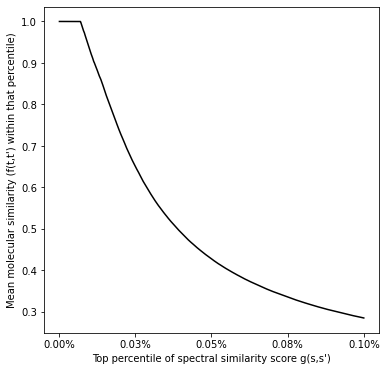

In [4]:
from custom_functions.plotting_functions import plot_precentile

percentile_cosine_nist = plot_precentile(matrix_similarities_tanimoto, matrix_similarities_nist, show_top_percentile=0.1)

## Importing Cosine Similarities with MassBank powers

In [5]:
filename = os.path.join(path,'similarities_cosine_tol05_mzp2_intp05.npy')
matrix_similarities_massbank = np.load(filename)

filename = os.path.join(path,'similarities_cosine_tol05_mzp2_intp05_matches.npy')
matrix_matches_massbank = np.load(filename)

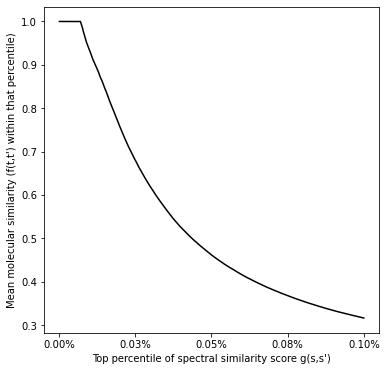

In [6]:
percentile_cosine_massbank = plot_precentile(matrix_similarities_tanimoto, matrix_similarities_massbank, show_top_percentile=0.1)


## Importing Cosine Similarities with Demuth powers

In [7]:
filename = os.path.join(path,'similarities_cosine_tol05_mzp0_intp033.npy')
matrix_similarities_demuth = np.load(filename)

filename = os.path.join(path,'similarities_cosine_tol05_mzp0_intp033_matches.npy')
matrix_matches_demuth = np.load(filename)

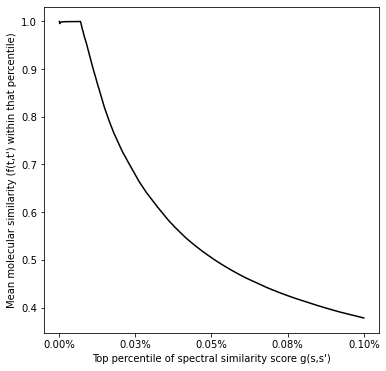

In [8]:
percentile_cosine_demuth = plot_precentile(matrix_similarities_tanimoto, matrix_similarities_demuth, show_top_percentile=0.1)


## Importing Spec2vec Similarities

In [9]:
filename = os.path.join(path, "similarities_spec2vec_3iter.npy")
matrix_similarities_spec2vec = np.load(filename)

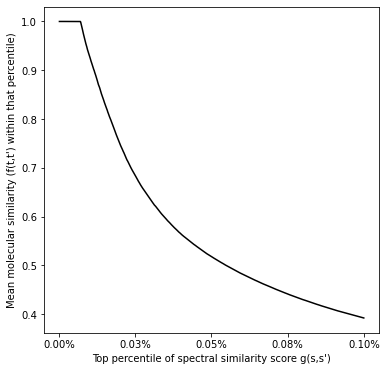

In [10]:
percentile_cosine_spec2vec = plot_precentile(matrix_similarities_tanimoto, matrix_similarities_spec2vec, show_top_percentile=0.1)


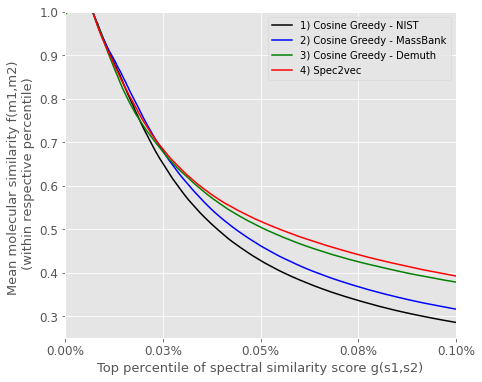

In [14]:
import matplotlib.pyplot as plt

num_bins = 1000
show_top_percentile = 0.1

plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(7,6))

x_percentiles = (show_top_percentile / num_bins * (1 + np.arange(num_bins)))[::-1]

plt.plot(x_percentiles, percentile_cosine_nist,
         color="black", label="1) Cosine Greedy - NIST")
plt.plot(x_percentiles, percentile_cosine_massbank,
         color="blue", label="2) Cosine Greedy - MassBank")
plt.plot(x_percentiles, percentile_cosine_demuth,
         color="green", label="3) Cosine Greedy - Demuth")
plt.plot(x_percentiles, percentile_cosine_spec2vec,
         color="red", label="4) Spec2vec")

    
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xticks(np.linspace(0, show_top_percentile, 5), 
          ["{:.2f}%".format(x) for x in np.linspace(0, show_top_percentile, 5)])
plt.legend()
plt.xlabel("Top percentile of spectral similarity score g(s1,s2)", fontsize=13)
plt.ylabel("Mean molecular similarity f(m1,m2) \n (within respective percentile)", fontsize=13)
plt.xlim(0, 0.1)
plt.ylim(0.25, 1.0)
plt.savefig(os.path.join(path, "Benchmarking_top_percentil_comparison2.pdf"))